In [1]:
# ------------------------import package-----------------------------
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle

import tensorflow as tf

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

In [2]:
# load dataset url => https://cocodataset.org/#download
train_image_path = os.path.join('/media/alex/AC6A2BDB6A2BA0D6/alex_dataset/COCO_2017', 'train2017')
train_annotation_path = os.path.join('/media/alex/AC6A2BDB6A2BA0D6/alex_dataset/COCO_2017', 'annotations', 'captions_train2017.json')

In [3]:
# set number examples
num_examples = 50000

# process annotation
with open(train_annotation_path, 'r') as f:
    annotations = json.load(f)

# store caption and image_id in vectors
all_captions = []
all_images = []

for annotation in annotations['annotations']:
    caption = '<start> ' + annotation['caption'] + ' <end>'
    image_id = annotation['image_id']
    img_path = os.path.join(train_image_path, '{:012d}.jpg'.format(image_id))
    
    all_captions.append(caption)
    all_images.append(img_path)
    
# shffle captions and image_path 
train_captions, train_images = shuffle(all_captions, all_images, random_state=0)

train_captions = train_captions[:num_examples]
train_images = train_images[:num_examples]


591753 50000
Caption content:  <start> A left lane ending sign near a one way sign and street lamps. <end>


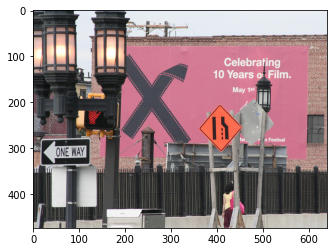

In [4]:
print(len(all_captions), len(train_captions))
print('Caption content: ',train_captions[0])
demo_image = plt.imread(train_images[0])
plt.imshow(demo_image)
plt.show()